# Run network creation in parallel.

For instructions how to install and activate ipyparallel for your notebook see 
https://github.com/ipython/ipyparallel

The instructions above are created on Linux. If you run on **Windows** and do not get the environment variables to work for ipcluster, then you might need to update ```IPYTHONDIR``` in cell 1, and ```u_file``` in cell 3 to point to the location that ipcluster writes the pid file to.

In [1]:
import os
from snudda import SnuddaInit

network_path = os.path.join("networks","simple_example_parallel")
si = SnuddaInit(struct_def={}, network_path=network_path, random_seed=123)
si.define_striatum(num_dSPN=200, num_iSPN=200, num_FS=4, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neurons_dir="$DATA/neurons")
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
No directory $DATA/neurons/striatum/ngf, skipping NGF cells.
Writing networks/simple_example_parallel/network-config.json


In [2]:
os.environ["IPYTHONDIR"] = os.path.join(os.path.abspath(os.getcwd()), ".ipython")
os.environ["IPYTHON_PROFILE"] = "default"
os.system("ipcluster start -n 4 --profile=$IPYTHON_PROFILE --ip=127.0.0.1 --log-level ERROR 2> parallel-log.txt &")

import time
time.sleep(10) # Wait for ipcluster to start

## Create network based on ```network-config.json``` (which was written by SnuddaInit)

In [3]:
from snudda import Snudda
snd = Snudda(network_path=network_path, parallel=True, ipython_profile="default")
snd.create_network()

Placing neurons
Network path: networks/simple_example_parallel
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=None from networks/simple_example_parallel/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/simple_example_parallel/network-synapses.hdf5
Generating 1968 points for networks/simple_example_parallel/mesh/Striatum-cube-mesh-0.00017120975070990257.obj
n_points = 1873, previous close_pairs = 3060
n_points = 1783, previous close_pairs = 2487
n_points = 1698, previous close_pairs = 2056
n_points = 1619, previous close_pairs = 1694
n_points = 1545, previous close_pairs = 1408
n_points = 1477, previous close_pairs = 1161
n_points = 1414, previous close_pairs = 965
n_points = 1357, previous close_pairs = 789
n_points = 1305, previous close_pairs = 676
n_points = 1258, previous close_pairs = 574
n_points = 1216, previous cl

In [4]:
os.system("ipcluster stop")

2024-02-01 12:33:34.334 [IPClusterStop] Stopping cluster 
2024-02-01 12:33:34.335 [IPClusterStop] Stopping controller
2024-02-01 12:33:34.524 [IPClusterStop] Stopping engine(s): 1706787173


0

In the folder ```networks/simple_example_parallel/log/``` you can find log files for touch detection. The file ```touch-detection.txt``` is the master node log, and the files ```touch-detection.txt-0``` up to ```n``` are the different worker logs where you can see what they are doing, since they do not print their output to stdout.

Reading SNUDDA_DATA=None from networks/simple_example_parallel/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/simple_example_parallel/network-synapses.hdf5


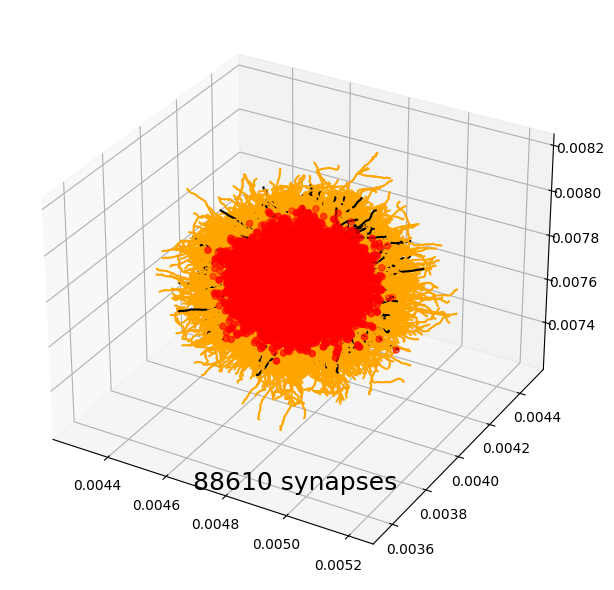

In [5]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it